# **Data Mining Final Project**
# Part 1: Data Preprocessing



# **Introduction:**

# This notebook focuses on preprocessing credit card transaction data for fraud detection.We're working with a highly imbalanced dataset (only 0.17% of transactions are fraudulent),which requires specialized preprocessing techniques to prepare the data for effective machine learning model training.

# The preprocessing pipeline includes data exploration, feature scaling, and preparation of balanced training datasets using stratified sampling. These steps are crucial for building effective fraud detection models in subsequent stages.


# Step 1: Import necessary libraries
# This section imports all the Python libraries we'll need for data manipulation, visualization, and preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Step 2: Load and explore the dataset
# Here we load the credit card fraud dataset and explore its basic characteristics to understand what we're working with

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('creditcard.csv')
print("Dataset shape:", data.shape)
print("Dataset info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

Saving creditcard.csv to creditcard.csv
Dataset shape: (284807, 31)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19 

# Step 4: Feature scaling
# We apply RobustScaler to the Amount feature to normalize it while being
# resistant to outliers, which are common in transaction data

In [ ]:
data['normAmount'] = RobustScaler().fit_transform(data['Amount'].values.reshape(-1, 1))


# Step 5: Feature selection
# We remove the Time and original Amount columns as they're not needed
# after scaling and could introduce bias

In [ ]:
data = data.drop(['Time', 'Amount'], axis=1)
print("\nDataset after feature selection and scaling:")
print(data.head())


Dataset after feature selection and scaling:
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26 

# Step 6: Feature correlation analysis
# This helps us understand relationships between features and
# identify potential redundancies

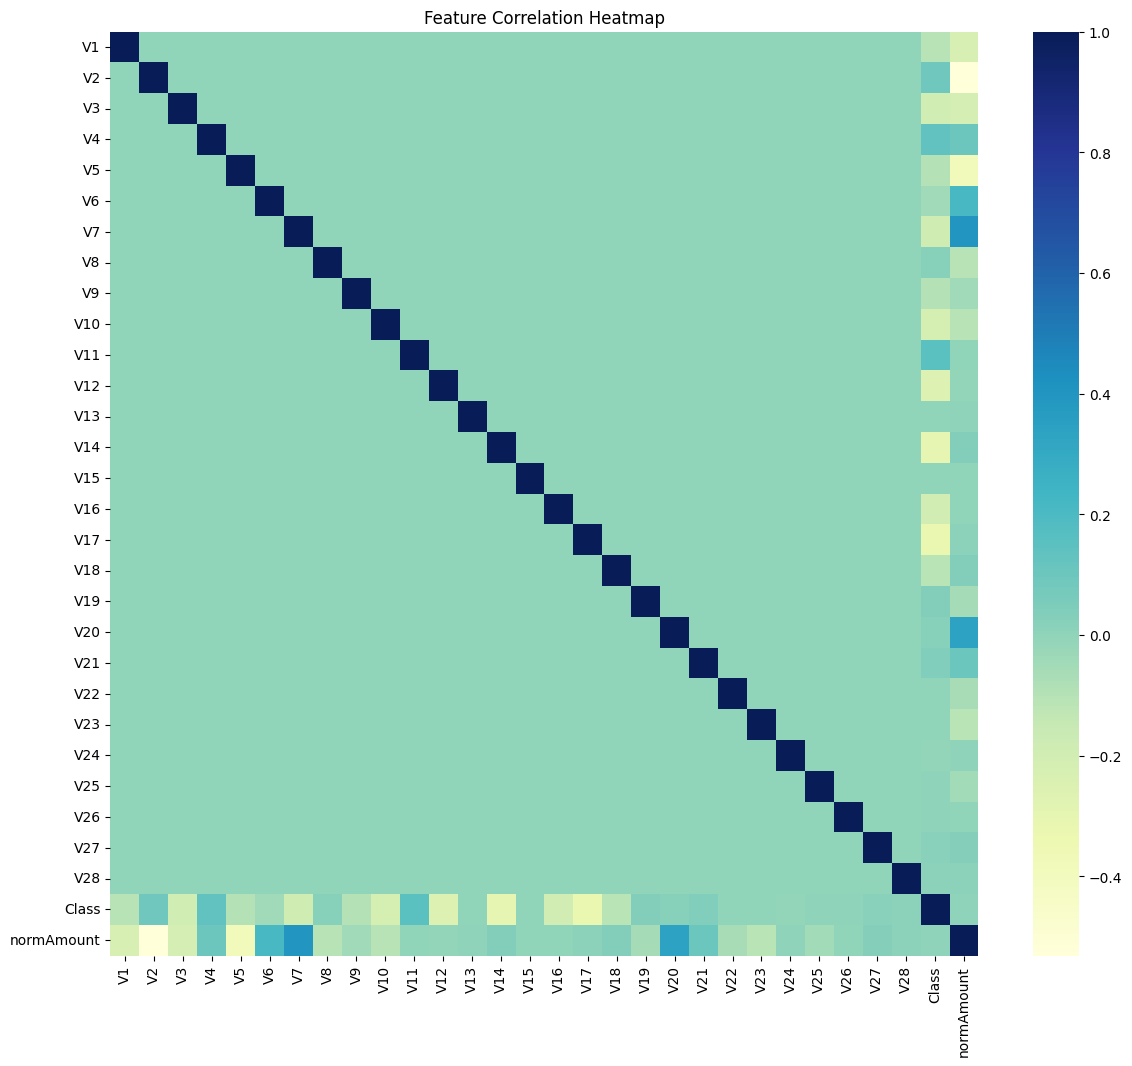

In [ ]:
plt.figure(figsize=(14, 12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 7: Data splitting
# We split the data into training and testing sets with stratified sampling
# to maintain the same class distribution in both sets

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Verify the split maintained class distribution

In [ ]:
print("\nTraining set:")
print("Fraud cases: {}".format(sum(y_train == 1)))
print("Normal cases: {}".format(sum(y_train == 0)))
print("Percentage: {:.4f}%".format(sum(y_train == 1)/len(y_train)*100))

print("\nTest set:")
print("Fraud cases: {}".format(sum(y_test == 1)))
print("Normal cases: {}".format(sum(y_test == 0)))
print("Percentage: {:.4f}%".format(sum(y_test == 1)/len(y_test)*100))



Training set:
Fraud cases: 394
Normal cases: 227451
Percentage: 0.1729%

Test set:
Fraud cases: 98
Normal cases: 56864
Percentage: 0.1720%


# Save preprocessed data for later use


In [ ]:
print("\nPreprocessing completed. Data is ready for model training.")



Preprocessing completed. Data is ready for model training.


# Save the new file

In [ ]:
# Save the preprocessed data in CSV format
import pandas as pd

# Convert an array to a DataFrame
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Add target variable
X_train_df['Class'] = y_train
X_test_df['Class'] = y_test

# save as CSV
X_train_df.to_csv('train_preprocessed.csv', index=False)
X_test_df.to_csv('test_preprocessed.csv', index=False)

# download CSV file
from google.colab import files
files.download('train_preprocessed.csv')
files.download('test_preprocessed.csv')

print("The data has been saved in CSV format and downloaded to your local machine")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The data has been saved in CSV format and downloaded to your local machine
